<a href="https://colab.research.google.com/github/pasayat-siddhartha/Capstone_Project01_EDA_Airbnb_Booking_Analysis/blob/main/SP_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Airbnb, as in “Air Bed and Breakfast,” is a service that lets property owners rent out their spaces to travelers looking for a place to stay. Travelers can rent a space for multiple people to share, a shared space with private rooms, or the entire property for themselves.

##The model also gives you the opportunity to customize and personalize your guests’ experience the way you want.

##Airbnb was started in 2008 by Brian Chesky and Joe Gebbia, based in San Fransisco California.The platform is accessible via website and mobile app.

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

##Capstone Project_01 - 'Exploratory Data Analysis of Airbnb booking dataset'

We are going to find answers to the following questions - 

1) Who are the top Hosts and which are the top Neighbourhoods, and 
Neighbourhood groups based on their turnover?


2) Type of Rooms based on price, availability on 365 days?

3) Top ten neighbourhoods based on listing price.

4) Location where customer spends maximum night.

In [93]:
# Import the necessary python libraries
import numpy as np                             # Handles arrays and mathematical operations
import matplotlib.pyplot as plt                # Creates 2D graphs and arrays 
import pandas as pd                            # Data handling and wrangling
import seaborn as sns                          # Statistical graphical distributions

In [94]:
# Mount Google Drive to read data available
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [96]:
# From pandas read csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone_Project01_EDA_Siddhartha_Pasayat/Airbnb_NYC_2019.csv')

In [97]:
# Check first 5 instances of data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [98]:
# Check the size of Dataset
df.shape

(48895, 16)

###Our Dataset has 48895 rows and 16 columns

In [99]:
# Check non- null count, data type in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [100]:
# Check column names in dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

#Data set has following features - 

1) id - Unique id identifying Airbnb listing

2) name - Represents accomodation

3) host_id - Unique id identifying Airbnb Host

4) host_name - Name under whom host is registered

5) neighbourhood_group - A group of area

6) neighbourhood - neighbourhood_group falls under area

7) latitude- coordinates of listing

8) longitude- coordinates of listing

9) room_type- types of accomodation present

10) price- tariff of listing

11) minimum_nights- minimum nights required to stay during single visit

12) number_of_reviews - total count of reviews given by customers

13) last_review - date of last reviews given  

14) review_per_month - reviews recieved per month 

15) calculated_host_listings_count - total number of listing registered under host name

16) availability_365 - number of days host/property is available throughout the year

In [101]:
# Check for any null values if present in columns
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Columns like name, host name, last_review and reviews_per_month have null values.

In [103]:
# Use fillna() method to replace the NULL values with a specified value.
df.fillna(0, inplace=True)

In [104]:
# Check  again for null values
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [105]:
# Describe function is used to get a descriptive status of the dataframe.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### We see that minimum price is zero which is not possible and max value of minimum nights is 1250 which is not possible.So we assign 100$ to minimum price and setting a limit of minimum_nights not exceeding 365.

In [106]:
# Use dropna() to remove rows having null values
df.dropna().head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [107]:
# Define a function to correct minimum price , we replace where price is zero to 100$
def price_correction(z):
    if z==0:
        return 100
    else:
        return z

In [108]:
# Identify Rows which have 'price'=0
df[df['price']==0]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [109]:
# Replace all price = 0 by price = 100 $
df['price']=df['price'].apply(price_correction)

In [110]:
df['price'].isnull().sum()

0

In [111]:
# Maximum stay can't be  greater than 365 days hence we have to define a function to set maximum of minimum_night to 365
def minimum_night_count(y):
 if y > 365:
    y==365
 else:
    y==y
    return y

In [112]:
# Apply Maximum of Minimum_nights to 365
df['minimum_nights']= df['minimum_nights'].apply(minimum_night_count)

In [113]:
# Check whether the corrected values in the particular features have been updated in dataframe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48881.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.743184,6.840429,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.144546,16.452017,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


### Now the above data in the dataframe is ready for analysis.

##1) Who are the top Hosts and which are the top Neighbourhoods, and Neighbourhood groups based on their turnover?

In [114]:
# Find out Top hosts, neighbourhoods, neighbourhood groups based on turnover
top_host = df.groupby(['host_name','host_id'], as_index= False)['price'].sum().reset_index().sort_values('price', ascending= False)
top_host.head()

,index,host_name,host_id,price
33240,33240,Sonder (NYC),219517861,82795
4876,4876,Blueground,107434423,70331
31247,31247,Sally,156158778,37097
29859,29859,Red Awning,205031545,35294
18986,18986,Kara,30283594,33581


### Inference
Top hosts based on turnover are Sonder(NYC), Blueground, Sally, Red Awning and Kara.

In [115]:
top_host_neighbourhood = df.groupby(['neighbourhood','host_id'], as_index= False)['price'].sum().reset_index().sort_values('price', ascending= False)
top_host_neighbourhood.head()

,index,neighbourhood,host_id,price
14252,14252,Financial District,219517861,57738
24660,24660,Midtown,205031545,35294
6912,6912,Chelsea,3750764,18780
31514,31514,Upper West Side,836168,15000
8144,8144,Clinton Hill,1177497,14850


### Inferences
1)Top neighbourhood are Financial District, Midtown, Chelsea, Upper West Side and Clinton Hill

2)All these neighbourhood belong to Manhattan neighbourhood group.

[Text(0.5, 1.0, 'Neighbourhood vs Turnover')]

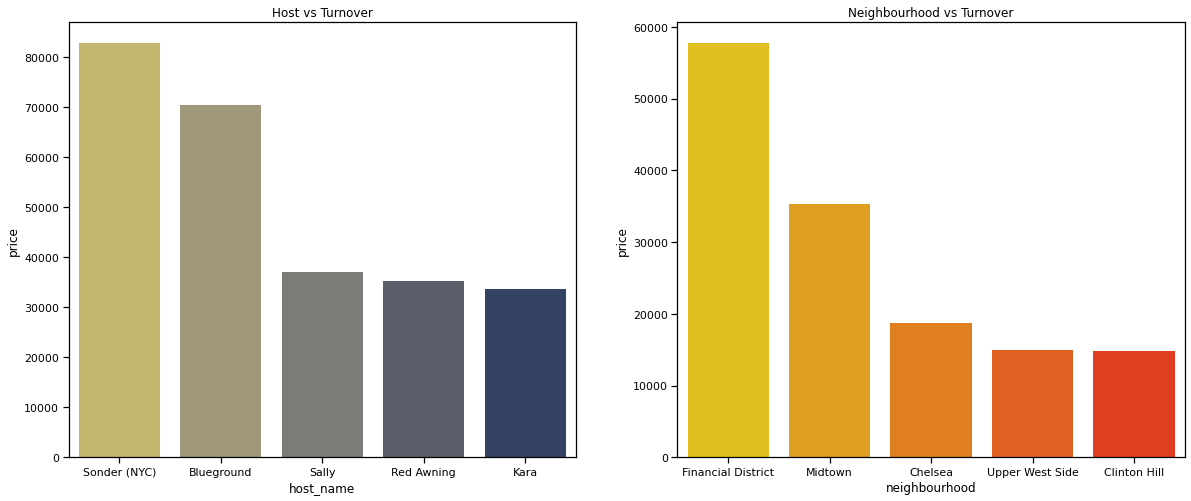

In [116]:
# Plot Barplot for visualization of the above analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax = axes.flatten()
sns.barplot(x='host_name', y='price', data = top_host.head() , ax=ax[0], palette='cividis_r').set(title ='Host vs Turnover')
sns.barplot(x='neighbourhood', y='price', data = top_host_neighbourhood.head(), ax=ax[1], palette='autumn_r').set(title ='Neighbourhood vs Turnover')


###Inference
 
Financial District being Manhattan city's buzzing heart very aptly coincides with our analysis to be on the top in case of Turnover.

## 2) Room type selection based on price and it's availability on 365 days

Text(0.5, 1.0, 'Proportion of Room Types')

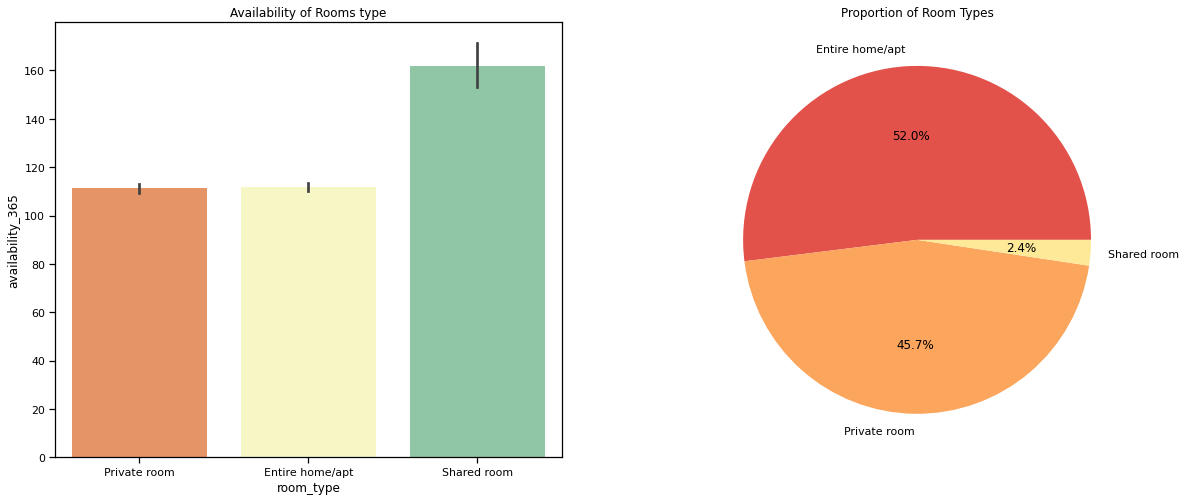

In [117]:
# Plot Barplot and Pie Chart for Data Visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax = axes.flatten()

#define Seaborn color palette to use
colors = sns.color_palette('Spectral')[0:5]

sns.barplot(data=df, x='room_type', y='availability_365', ax=ax[0], palette = 'Spectral' )
ax[0].set_title("Availability of Rooms type");
labels = df['room_type'].value_counts().index
sizes = df['room_type'].value_counts().values
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%',colors = colors)
ax[1].set_title('Proportion of Room Types')

### Inferences

1) Shared rooms are more available throughout the year as compared to Private rroms and Entire Home/Appartment making this easier for students or daily workers for their hault.

2) Entire Home/Apt and Private Rooms take a lion share in terms of their cummulative presence in the neighbourhoods.

3) Shared rooms have a meagre presence indicating not much demand of these rooms as nowadays less people are preferring to share common space and ammenities hence limiting it to a particular sect of customers.

Text(0.5, 1.0, 'Neighbourhood vs Price')

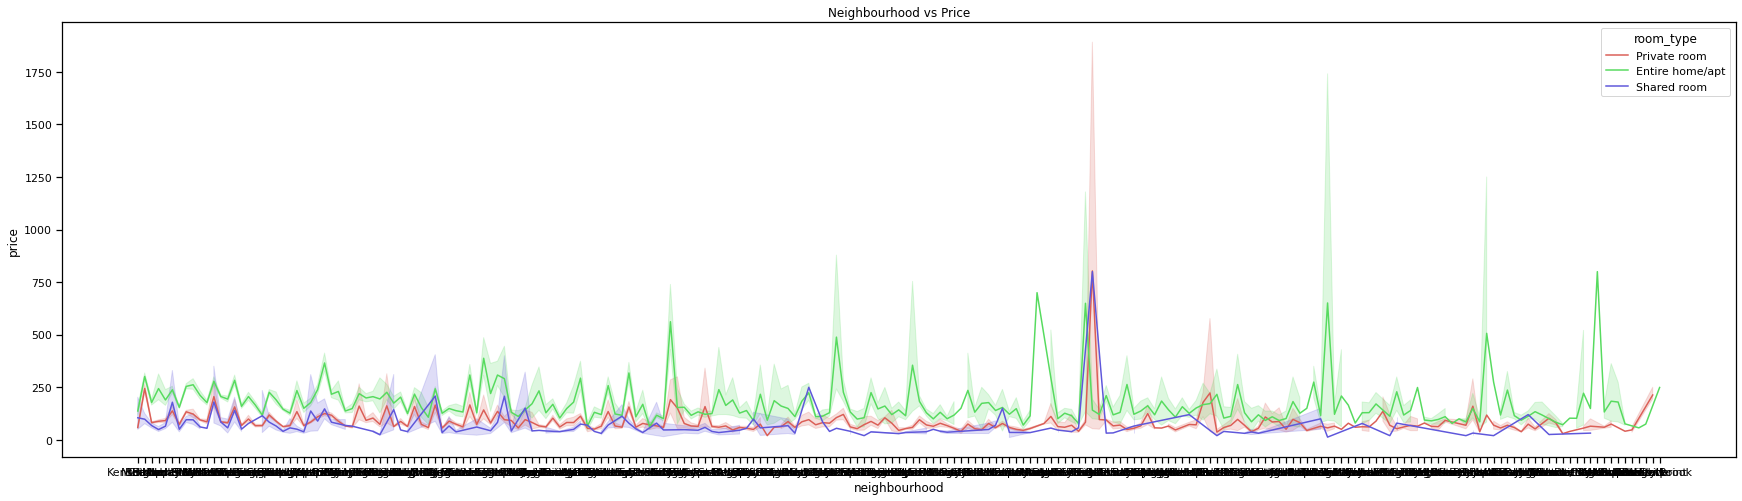

In [118]:
# Plot the line plot of dataframe for neighbourhood vs price
fig = plt.figure(figsize=(30, 8))
sns.lineplot(data=df, x='neighbourhood', y='price', hue='room_type',palette="hls")
plt.title('Neighbourhood vs Price')

###Inference

With this plot it is quite evident that Entire room/apt has all time high price throughout the neighbourhood.


Text(0.5, 1.0, 'Neighbourhood group vs Price')

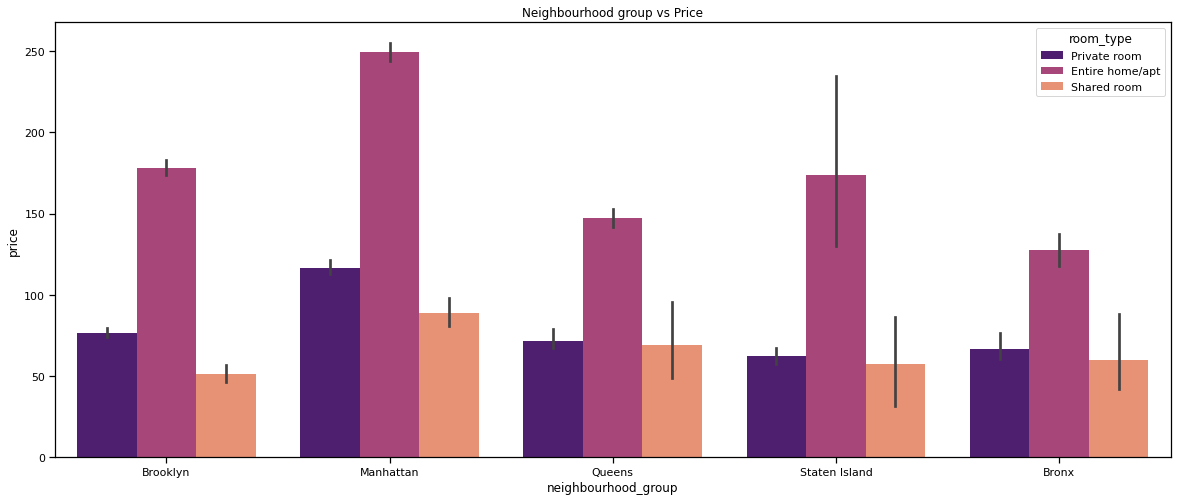

In [119]:
# Plot a barplot to visualize the neighbourhood and prices of various rooms
fig = plt.figure(figsize=(20, 8))
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type', palette="magma")
plt.title('Neighbourhood group vs Price')

###Inference

Entire home/apt has maintaine higher price in all neighbourhoods and it is highest in Manhattan